# **PHONE PAY PULSE VISUALIZATION**

In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
import getpass
password = getpass.getpass("Enter MySQL password: ")

# Connecting to MySQL
connection = mysql.connector.connect(
    host="localhost",               
    user="root",                     
    password=password, 
    database="phonepe_data"   
)

print("Connected to MySQL successfully.")

Enter MySQL password:  ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


Connected to MySQL successfully.


In [3]:
query = "SELECT * FROM aggregated_insurance LIMIT 5;"
data = pd.read_sql(query, connection)
data

State  Year Quarter Insurance_Type  Transaction_Count  \
0  andaman-&-nicobar-islands  2020      Q2      Insurance                  6   
1  andaman-&-nicobar-islands  2020      Q3      Insurance                 41   
2  andaman-&-nicobar-islands  2020      Q4      Insurance                124   
3  andaman-&-nicobar-islands  2021      Q1      Insurance                225   
4  andaman-&-nicobar-islands  2021      Q2      Insurance                137   

   Transaction_Amount  
0              1360.0  
1             15380.0  
2            157975.0  
3            244266.0  
4            181504.0

## 1. Transaction Dynamics - Top 10 States by Amount

In [6]:
query = """
SELECT State, SUM(Transaction_Amount) AS Total_Amount
FROM aggregated_transaction
GROUP BY State
ORDER BY Total_Amount DESC
LIMIT 10;
"""

data_txn = pd.read_sql(query, connection)
data_txn

State  Total_Amount
0       telangana  4.165596e+13
1       karnataka  3.974367e+13
2     maharashtra  3.936489e+13
3  andhra-pradesh  3.466908e+13
4   uttar-pradesh  2.688521e+13
5       rajasthan  2.634324e+13
6  madhya-pradesh  1.912528e+13
7           bihar  1.790135e+13
8     west-bengal  1.558416e+13
9          odisha  1.226398e+13

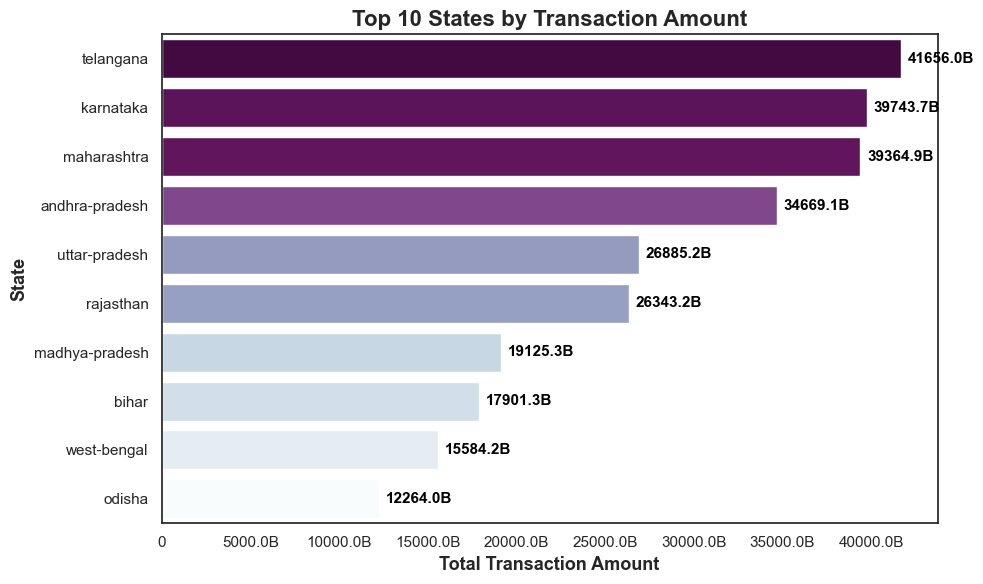

In [26]:
sns.set(style="white")

plt.rcParams.update({
    'font.size': 12,
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

def format_large_number(x):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    else:
        return str(int(x))

values = data_txn['Total_Amount']
norm = Normalize(vmin=min(values), vmax=max(values))

cmap = plt.cm.get_cmap("BuPu")  # Beautiful blue-purple gradient
colors = [cmap(norm(val)) for val in values]

data_sorted = data_txn.sort_values("Total_Amount", ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=data_sorted,
    y='State',
    x='Total_Amount',
    palette=colors  # üåà Smooth gradient applied
)

bar_plot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_large_number(x)))

for container in bar_plot.containers:
    labels = [format_large_number(val) for val in container.datavalues]
    bar_plot.bar_label(container, labels=labels, fontsize=11, fontweight='bold', color='black', padding=5)

plt.title("Top 10 States by Transaction Amount", fontsize=16, fontweight='bold')
plt.xlabel("Total Transaction Amount", fontsize=13)
plt.ylabel("State", fontsize=13)
plt.tight_layout()
plt.show()

## 2. Device Dominance by Brand

In [13]:
query_device = """
SELECT Brand, SUM(Count) AS Total_Users
FROM aggregated_user
GROUP BY Brand
ORDER BY Total_Users DESC
LIMIT 10;
"""

data_device = pd.read_sql(query_device, connection)
data_device

Brand  Total_Users
0    Xiaomi  869562617.0
1   Samsung  671603711.0
2      Vivo  625415019.0
3      Oppo  420250245.0
4    Others  282950234.0
5    Realme  219973222.0
6     Apple   95947314.0
7  Motorola   73340734.0
8   OnePlus   63677211.0
9    Huawei   57129693.0

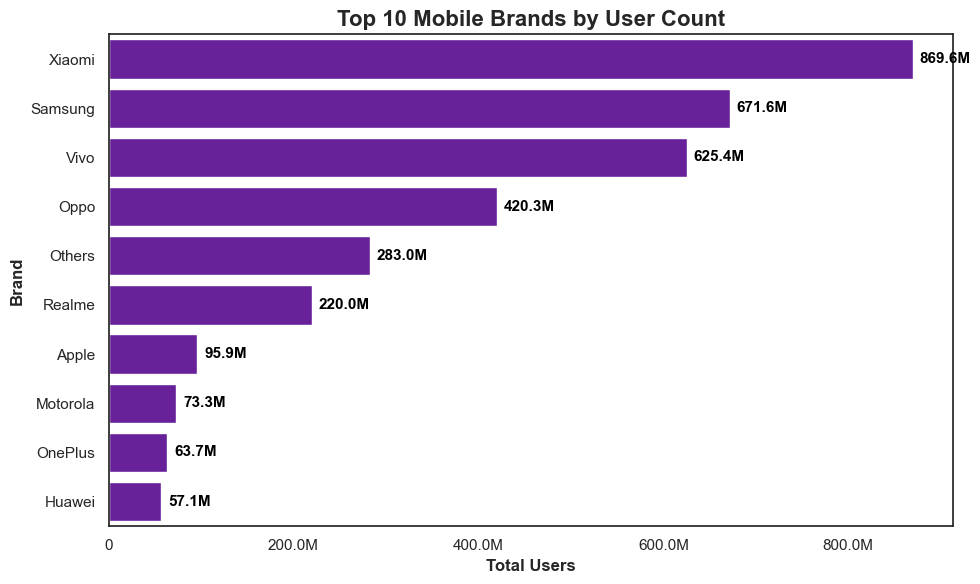

In [25]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=data_device.sort_values('Total_Users', ascending=False),
    x='Total_Users',
    y='Brand',
    color='#6A0DAD'  # consistent strong violet
)

bar_plot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_large_number(x)))
bar_plot.bar_label(bar_plot.containers[0],
                   labels=[format_large_number(v) for v in bar_plot.containers[0].datavalues],
                   fontsize=11, fontweight='bold', color='black', padding=5)

plt.title("Top 10 Mobile Brands by User Count", fontsize=16, fontweight='bold')
plt.xlabel("Total Users")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

## 3. Insurance by State

In [17]:
query_insurance = """
SELECT State, SUM(Transaction_Amount) AS Insurance_Amount
FROM aggregated_insurance
GROUP BY State
ORDER BY Insurance_Amount DESC
LIMIT 10;
"""
data_ins = pd.read_sql(query_insurance, connection)
data_ins

State  Insurance_Amount
0      karnataka      2.743155e+09
1    maharashtra      2.363129e+09
2  uttar-pradesh      1.740346e+09
3     tamil-nadu      1.555507e+09
4         kerala      1.313719e+09
5      telangana      1.171060e+09
6    west-bengal      1.052463e+09
7      rajasthan      9.596539e+08
8        haryana      8.309812e+08
9          delhi      8.153652e+08

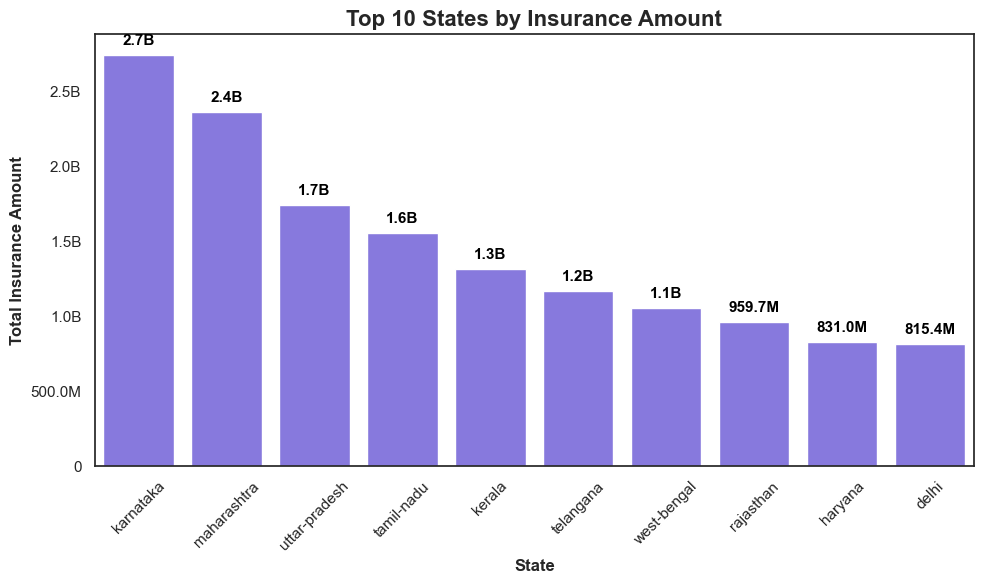

In [24]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=data_ins.sort_values('Insurance_Amount', ascending=False),
    x='State',
    y='Insurance_Amount',
    color='#7B68EE'  # medium indigo color (visible on all bars)
)

bar_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_large_number(x)))
bar_plot.bar_label(bar_plot.containers[0],
                   labels=[format_large_number(v) for v in bar_plot.containers[0].datavalues],
                   fontsize=11, fontweight='bold', color='black', padding=5)

plt.title("Top 10 States by Insurance Amount", fontsize=16, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Total Insurance Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.  App Opens by District

In [30]:
query_app_opens = """
SELECT District, SUM(App_Opens) AS Total_App_Opens
FROM map_user
GROUP BY District
ORDER BY Total_App_Opens DESC
LIMIT 10;
"""
data_app = pd.read_sql(query_app_opens, connection)
data_sorted = data_app.sort_values('Total_App_Opens', ascending=True)
data_app

District  Total_App_Opens
0  bengaluru urban district     8.626629e+09
1             pune district     6.244893e+09
2       ganganagar district     4.524202e+09
3           barmer district     3.492608e+09
4           nashik district     3.388420e+09
5           jaipur district     3.207851e+09
6      hanumangarh district     3.202109e+09
7          bikaner district     3.132601e+09
8       rangareddy district     3.037773e+09
9          jodhpur district     2.981714e+09

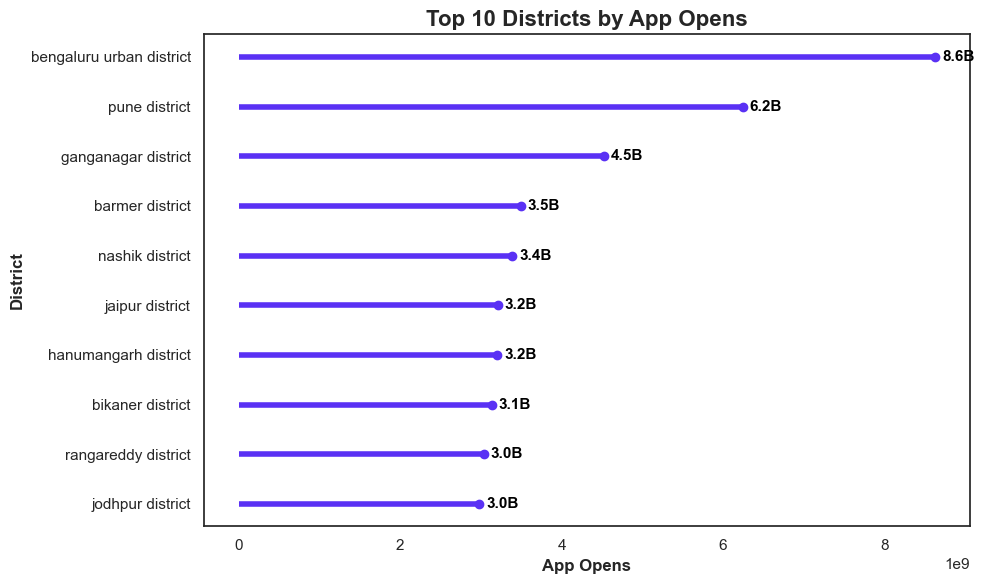

In [31]:
plt.figure(figsize=(10, 6))
plt.hlines(y=data_sorted['District'], xmin=0, xmax=data_sorted['Total_App_Opens'],
           color='#5A31F4', linewidth=4)
plt.plot(data_sorted['Total_App_Opens'], data_sorted['District'], 'o', color='#5A31F4')

for idx, val in enumerate(data_sorted['Total_App_Opens']):
    plt.text(val + max(data_sorted['Total_App_Opens']) * 0.01,
             idx,
             format_large_number(val),
             va='center', fontsize=11, fontweight='bold', color='black')

plt.title("Top 10 Districts by App Opens", fontsize=16, fontweight='bold')
plt.xlabel("App Opens")
plt.ylabel("District")
plt.tight_layout()
plt.show()

## 5. Districts by Transaction Amount

In [32]:
query_district_txn = """
SELECT Entity_Name AS District, SUM(Transaction_Amount) AS Total_Amount
FROM top_transaction
WHERE Entity_Level = 'district'
GROUP BY District
ORDER BY Total_Amount DESC
LIMIT 10;
"""
data_district = pd.read_sql(query_district_txn, connection)
data_district

District  Total_Amount
0     bengaluru urban  1.993784e+13
1           hyderabad  1.190694e+13
2                pune  9.730218e+12
3              jaipur  7.854092e+12
4          rangareddy  7.155140e+12
5  medchal malkajgiri  5.758878e+12
6       visakhapatnam  4.198568e+12
7              guntur  3.174527e+12
8               patna  3.110762e+12
9             khordha  2.992147e+12

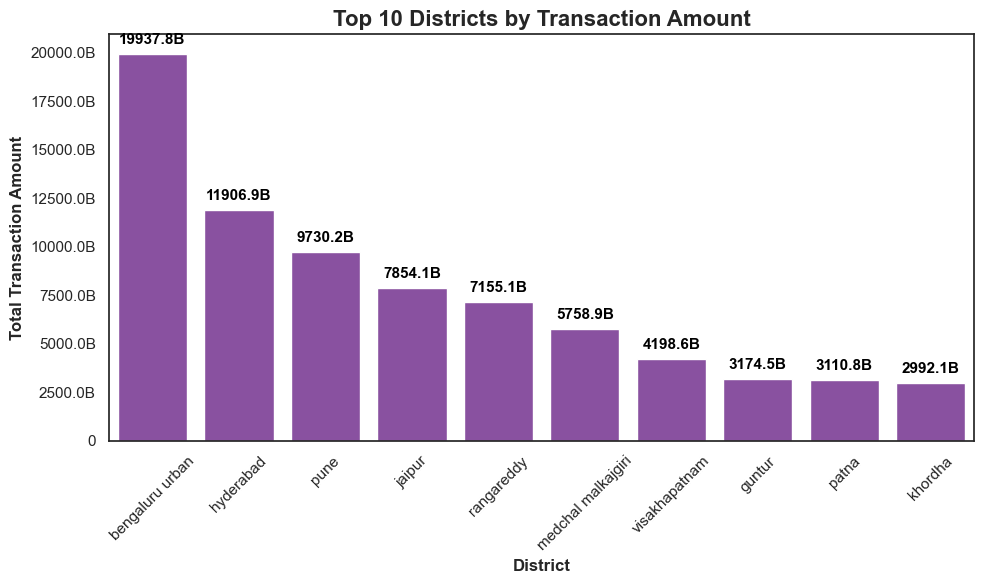

In [34]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=data_district.sort_values('Total_Amount', ascending=False),
    x='District',
    y='Total_Amount',
    color='#8E44AD'  # rich purple (high contrast)
)

bar_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_large_number(x)))
bar_plot.bar_label(bar_plot.containers[0],
                   labels=[format_large_number(v) for v in bar_plot.containers[0].datavalues],
                   fontsize=11, fontweight='bold', color='black', padding=5)

plt.title("Top 10 Districts by Transaction Amount", fontsize=16, fontweight='bold')
plt.xlabel("District")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Final Summary and Insights - PhonePe Pulse Visualization

## Objective

This project explores real transactional and usage data from PhonePe Pulse. Using SQL and Python, we extracted, analyzed, and visualized key business insights in five focus areas: digital payments, user behavior by device, insurance adoption, engagement by region, and high-performing districts.

The goal was to convert raw backend data into understandable visuals to support real-world business decisions.

---

## Tools and Libraries Used

- **MySQL Connector**: To connect Python with the SQL database where all the cleaned CSV files were stored.
- **Pandas**: For working with query results and transforming tabular data.
- **Seaborn & Matplotlib**: For clean and customized charts, styled to PhonePe‚Äôs visual theme.
- **Matplotlib Ticker & Normalize**: To display values as ‚ÄúM‚Äù (millions) or ‚ÄúB‚Äù (billions), and apply color intensity to charts.
- **Getpass**: Used to securely input the database password without displaying it in code or PDF exports.

These tools were selected for their strength in analytics and visual storytelling.

---

## Business Case Studies and Key Visual Insights

### 1. Transaction Dynamics Across States

**Goal**: Identify states with the highest transaction volumes.

**Data**: Aggregated transaction amount by state from `aggregated_transaction`.

**Top 3 States by Total Transaction Amount**:
- Telangana: ‚Çπ41.66 Trillion  
- Karnataka: ‚Çπ39.74 Trillion  
- Maharashtra: ‚Çπ39.36 Trillion  

**Insight**:
- These states contribute heavily to PhonePe‚Äôs overall transaction volume.
- Northeastern and northern states show lower engagement, suggesting future growth potential.

**Business Use**:
- Focus regional marketing efforts and merchant expansion in high-performing states.
- Improve adoption in low-performing areas through awareness campaigns.

---

### 2. Device Dominance by Mobile Brand

**Goal**: Understand which smartphone brands are most used by PhonePe users.

**Data**: Number of registered users by brand from `aggregated_user`.

**Top 5 Brands by Users**:
- Xiaomi: 869.6 Million  
- Samsung: 671.6 Million  
- Vivo: 625.4 Million  
- Oppo: 420.2 Million  
- Realme: 219.9 Million  

**Insight**:
- Over 80% of users come from Android brands, mostly mid-range smartphones.
- Apple and OnePlus have relatively lower adoption in the PhonePe ecosystem.

**Business Use**:
- Prioritize app testing and optimization on dominant Android devices.
- Streamline development resources toward the devices with the widest reach.

---

### 3. Insurance Penetration by State

**Goal**: Measure growth and adoption of digital insurance services.

**Data**: Insurance transaction amount by state from `aggregated_insurance`.

**Top 3 States by Insurance Amount**:
- Karnataka: ‚Çπ2.74 Billion  
- Maharashtra: ‚Çπ2.36 Billion  
- Uttar Pradesh: ‚Çπ1.74 Billion  

**Insight**:
- Southern and western states lead in insurance adoption.
- Eastern and some northern states reflect lower awareness or engagement.

**Business Use**:
- Focus insurance marketing and financial literacy in underpenetrated regions.
- Scale partnerships with insurers in top-performing states.

---

### 4. App Opens by District

**Goal**: Track user engagement and frequency of app use at a local level.

**Data**: App open counts by district from `map_user`.

**Top 3 Districts by App Opens**:
- Bengaluru Urban: 8.63 Billion  
- Pune: 6.24 Billion  
- Ganganagar: 4.52 Billion  

**Insight**:
- Metro cities and some tier-2 districts show consistent high usage.
- App opens strongly correlate with transaction behavior.

**Business Use**:
- Deploy location-based promotions and service enhancements in high-use districts.
- Consider expanding merchant support and logistics in top districts.

---

### 5. Top Districts by Transaction Value

**Goal**: Identify local markets driving the most financial activity.

**Data**: Transaction volume by district from `top_transaction`.

**Top 3 Districts by Transaction Amount**:
- Bengaluru Urban: ‚Çπ19.94 Trillion  
- Hyderabad: ‚Çπ11.91 Trillion  
- Pune: ‚Çπ9.73 Trillion  

**Insight**:
- Urban centers dominate PhonePe‚Äôs ecosystem in both volume and value.
- There is room to grow in non-metro and semi-urban areas.

**Business Use**:
- Continue strengthening partnerships in financial and retail sectors in these districts.
- Use these districts to pilot new features or services.

---

### Bonus Insight: Device Engagement Analysis

**Why added**: To assess if device brands with high registrations also drive high usage.

**Data**: Ratio of App Opens √∑ Registered Users.

**Example Insight**:
- Samsung and Xiaomi had both high registrations and high engagement rates.
- Certain brands had high registrations but low opens, signaling UX or performance issues.

**Business Use**:
- Investigate technical limitations or friction on underused devices.
- Re-target disengaged users through push campaigns or app optimizations.

---

## Overall Summary

- Digital payment activity is concentrated in a few leading states and districts.
- Mid-range Android smartphones dominate user access and engagement.
- Insurance service growth is visible but regionally uneven.
- App engagement at the district level gives clear insight into product loyalty.
- Pairing user data with usage patterns offers better segmentation and decision-making.
